In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
!pip install -q tensorflow-gpu

In [1]:
import keras
from keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
tf.__version__
tf.test.is_gpu_available()

True

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(train_image, train_label), (test_image, test_label) = fashion_mnist.load_data()

In [5]:
train_image.shape

(60000, 28, 28)

In [6]:
test_image.shape

(10000, 28, 28)

In [10]:
train_image = np.expand_dims(train_image, -1)

In [11]:
train_image.shape

(60000, 28, 28, 1)

In [12]:
test_image = np.expand_dims(test_image, -1)

In [ ]:
model = tf.keras.Sequential()    # 顺序模型
model.add(tf.keras.layers.Conv2D(64, (3, 3), input_shape=train_image.shape[1:], activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [ ]:
model.summary()

In [16]:
history = model.fit(train_image, train_label, epochs=30, validation_data=(test_image, test_label))

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
60000/60000 [==============================] - 20s 328us/sample - loss: 0.7998 - acc: 0.6970 - val_loss: 0.4874 - val_acc: 0.8312
Epoch 2/30
60000/60000 [==============================] - 17s 292us/sample - loss: 0.4709 - acc: 0.8276 - val_loss: 0.4177 - val_acc: 0.8532
Epoch 3/30
60000/60000 [==============================] - 18s 296us/sample - loss: 0.4211 - acc: 0.8442 - val_loss: 0.3613 - val_acc: 0.8619
Epoch 4/30
60000/60000 [==============================] - 18s 293us/sample - loss: 0.3928 - acc: 0.8570 - val_loss: 0.3639 - val_acc: 0.8723
Epoch 5/30
60000/60000 [==============================] - 18s 293us/sample - loss: 0.3795 - acc: 0.8616 - val_loss: 0.3268 - val_acc: 0.8752
Epoch 6/30
60000/60000 [==============================] - 18s 301us/sample - loss: 0.3679 - acc: 0.8656 - val_loss: 0.3238 - val_acc: 0.8842
Epoch 7/30
60000/60000 [==============================] 

In [17]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

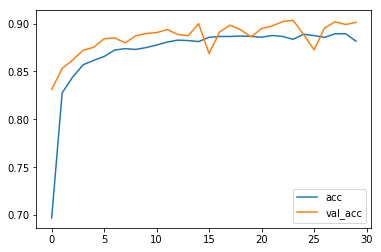

In [18]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()

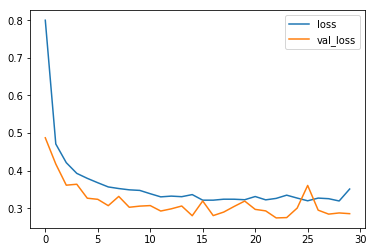

In [22]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()